In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/cluster_mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
# The data contains a different metrics ---> We need to scale this!
# (If the distance metrics have been used --> "I should probably scaling")

In [7]:
# for 'origin' we need to make dummies varables.
df['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [4]:
# and we don't need to worry about 'drop first', because its unsepervised learning.
df_w_dummies = pd.get_dummies(df.drop('name', axis=1))

In [5]:
df_w_dummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
388,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
389,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
390,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()

In [8]:
scaled_data = scaler.fit_transform(df_w_dummies)

In [9]:
scaled_df = pd.DataFrame(scaled_data, columns=df_w_dummies.columns)

<AxesSubplot:>

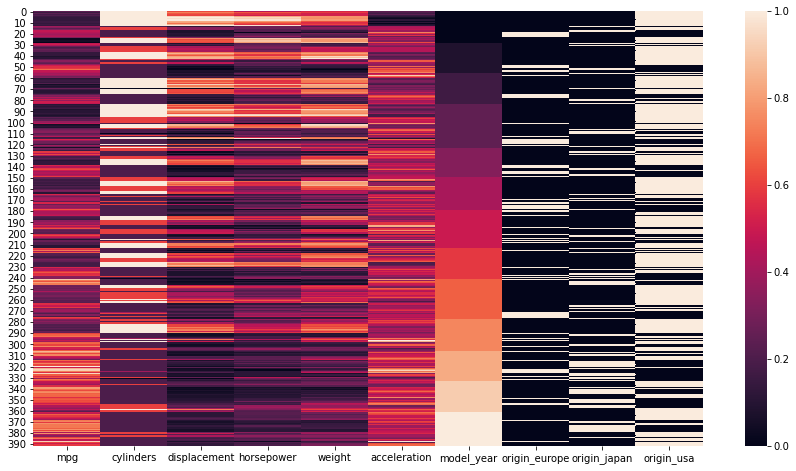

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(scaled_df) #cmap='viridis'

<Figure size 1080x576 with 0 Axes>

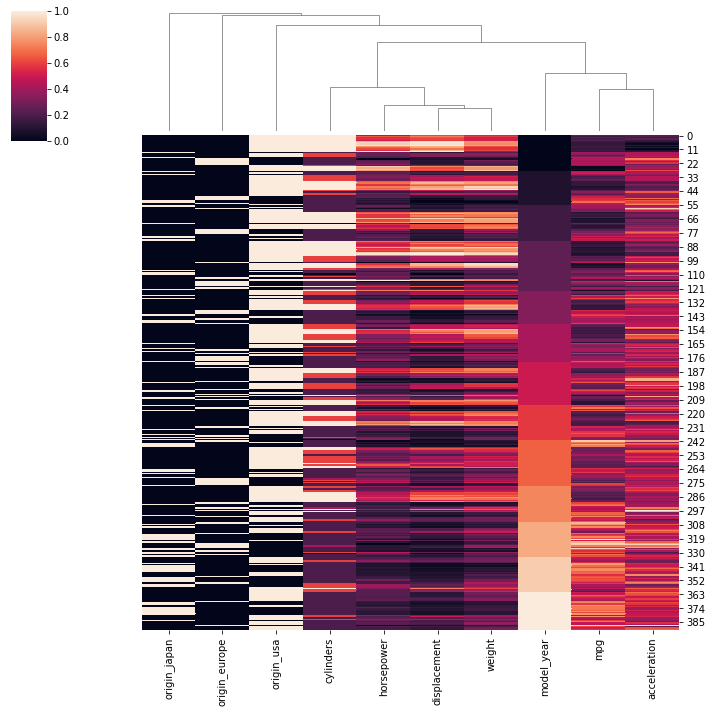

In [11]:
plt.figure(figsize=(15,8))
sns.clustermap(scaled_df, row_cluster=False)

# in numerical:
# scaled_df.corr() or sns.heatmap(scaled_df.corr())

In [20]:
# But we don't need to 'work' with columns - we need 'rows':

<Figure size 1080x576 with 0 Axes>

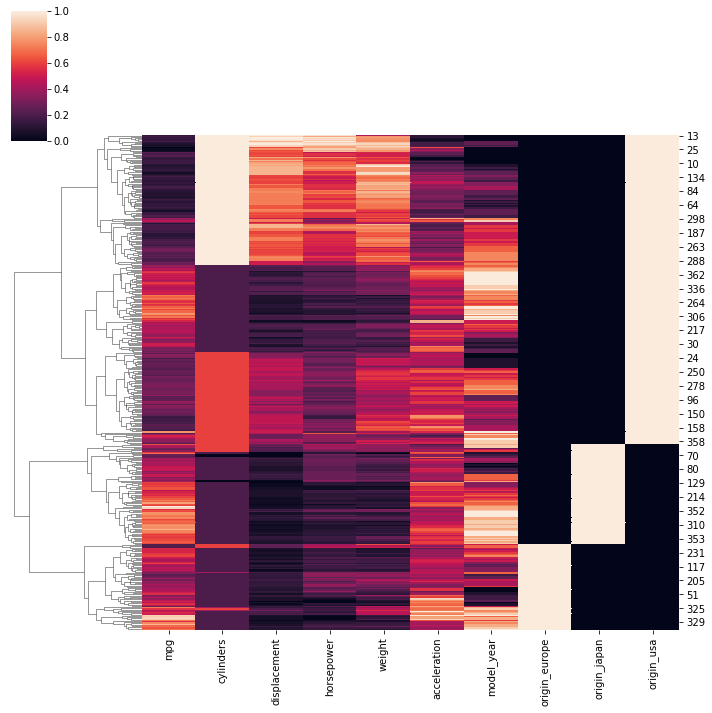

In [13]:
plt.figure(figsize=(15,8))
sns.clustermap(scaled_df, col_cluster=False)

In [14]:
len(df)

392

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
model = AgglomerativeClustering(n_clusters=4)

In [17]:
# we work with scaled df

In [18]:
cluster_labels = model.fit_predict(scaled_df)

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

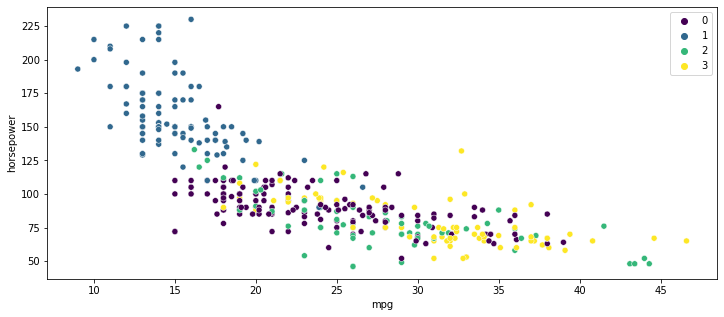

In [24]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df, x='mpg', y='horsepower', hue=cluster_labels, palette='viridis')

In [25]:
# what the max distance possible?
# sqrt(N_features)

In [26]:
len(scaled_df.columns)

10

In [29]:
np.sqrt(10) # max distance possible between two points (for MIN/MAX SCALING)

3.1622776601683795

In [30]:
model_2 = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

In [31]:
cluster_labels_2 = model_2.fit_predict(scaled_df)

In [32]:
# for shreshold = 0:
cluster_labels_2

array([247, 252, 360, 302, 326, 381, 384, 338, 300, 279, 217, 311, 377,
       281, 232, 334, 272, 375, 354, 333, 317, 345, 329, 289, 305, 383,
       290, 205, 355, 269, 202, 144, 245, 297, 386, 358, 199, 337, 330,
       339, 293, 352, 283, 196, 253, 168, 378, 331, 201, 268, 256, 361,
       250, 197, 246, 371, 324, 230, 203, 261, 380, 376, 308, 389, 332,
       306, 236, 391, 350, 274, 288, 313, 231, 298, 100, 295, 210, 248,
       187, 390, 373, 266, 307, 379, 212, 357, 191, 314, 208, 249, 343,
       294, 374, 322, 323, 362, 188, 296, 369, 286, 251, 229, 244, 285,
       349, 365, 259, 213, 276, 215, 222, 204, 359, 287, 166, 387, 291,
       220, 216, 260, 129, 367, 340, 346, 301, 342, 228, 388, 370, 218,
       255, 327, 347, 278, 271, 258, 282, 318, 273, 123, 172, 382, 363,
       356, 195, 280, 239, 364, 267, 351, 186, 257, 277, 299, 127, 366,
       234, 385, 192, 372, 292, 233, 270, 263, 133, 165, 161, 198,  97,
       315, 134, 207, 147, 175, 262, 348,  98, 214,  48, 353, 17

In [34]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [35]:
linkage_matris = hierarchy.linkage(model.children_)

In [36]:
linkage_matris

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

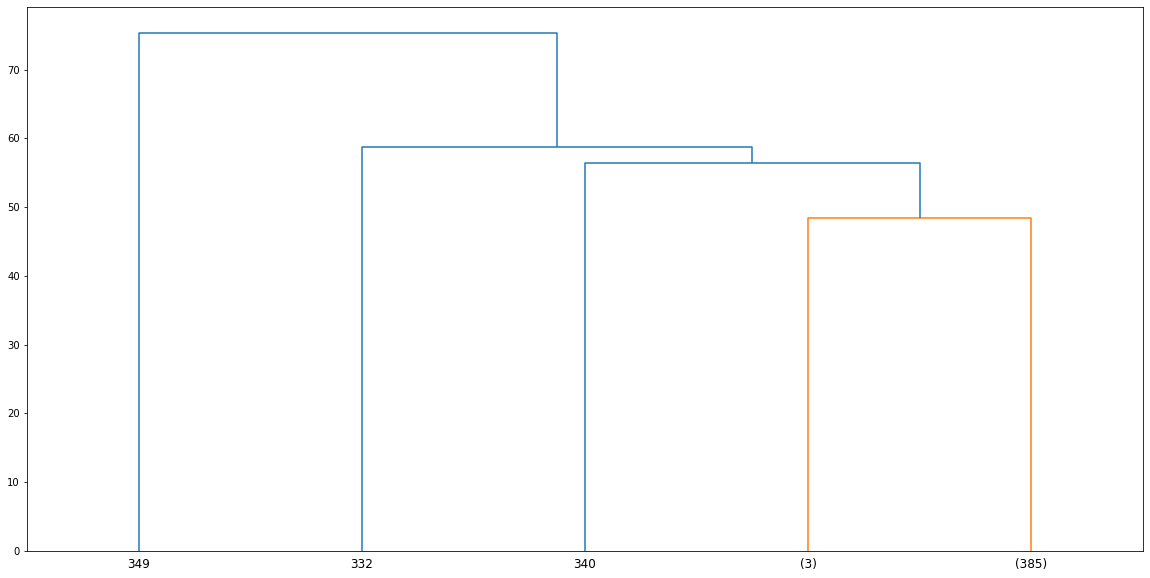

In [39]:
plt.figure(figsize=(20,10))
dendro = dendrogram(linkage_matris, truncate_mode='level', p=3)
# dendro = dendrogram(linkage_matris, truncate_mode='lastp', p=10)

In [49]:
# theoretical distance
np.sqrt(len(scaled_df.columns))

3.1622776601683795

In [43]:
scaled_df['mpg'].idxmax()

320

In [44]:
scaled_df['mpg'].idxmin()

28

In [50]:
# realistical distance

In [45]:
car_a = scaled_df.iloc[320]

In [46]:
car_b = scaled_df.iloc[28]

In [47]:
distance = np.linalg.norm(car_a - car_b)

In [48]:
distance

2.3852929970374714

In [51]:
# after that --> change ""distance_threshold=0 (model_2 = AgglomerativeClustering(n_clusters=None, distance_threshold=0))